In [1]:
import ROOT as r
r.gStyle.SetOptStat(0)

Welcome to JupyROOT 6.22/00


In [22]:
fUL_data = r.TFile('/afs/hep.wisc.edu/user/kaho/NDHiggs/results/2017/makeHist/data.root')
fUL_GG = r.TFile('/afs/hep.wisc.edu/user/kaho/NDHiggs/results/2017/makeHist/GluGlu_LFV_HToEMu_M125.root')
f_data = r.TFile('/afs/hep.wisc.edu/home/kaho/CMSSW_10_2_16_UL/src/UWHiggs2017/em/results/Data2017JEC/AnalyzeEMYield/noJnoB/data.root')
f_GG = r.TFile('/afs/hep.wisc.edu/home/kaho/CMSSW_10_2_16_UL/src/UWHiggs2017/em/results/Data2017JEC/AnalyzeEMYield/noJnoB/GluGlu_LFV_HToEMu_M125_13TeV_powheg_pythia8_v2-PU2017_12Apr2018_94X_mc2017_realistic_v14-v1.root')

In [23]:
h1 = fUL_GG.Get('emMass')
h2 = f_GG.Get('TightOS/emMass')
print ('UL GG', h1.Integral())
print ('Rereco GG', h2.Integral())
print ('% diff GG', (h1.Integral()-h2.Integral())*100/h1.Integral())
h1 = fUL_data.Get('emMass')
h2 = f_data.Get('TightOS/emMass')
print ('UL data', h1.Integral())
print ('Rereco data', h2.Integral())
print ('% diff data', (h1.Integral()-h2.Integral())*100/h1.Integral())

UL GG 7040.593405783176
Rereco GG 6973.11768572568
% diff GG 0.9583811501182831
UL data 36342.0
Rereco data 36438.0
% diff data -0.26415717351824336


GluGlu_LFV_HToEMu_M125
Name: j1Eta Title:  NbinsX: 50 Name: j1Eta Title: j1Eta NbinsX: 50
VBF_LFV_HToEMu_M125
Name: j1Eta Title:  NbinsX: 50 Name: j1Eta Title: j1Eta NbinsX: 50
diboson
Name: j1Eta Title:  NbinsX: 50 Name: j1Eta Title: j1Eta NbinsX: 50
TTTo2L2Nu
Name: j1Eta Title:  NbinsX: 50 Name: j1Eta Title: j1Eta NbinsX: 50
data
Name: j1Eta Title:  NbinsX: 50 Name: j1Eta Title: j1Eta NbinsX: 50


Warning in <TH1D::Divide>: Dividing histograms with different bin limits
Warning in <TH1D::Divide>: Dividing histograms with different bin limits
Warning in <TH1D::Divide>: Dividing histograms with different bin limits
Warning in <TH1D::Divide>: Dividing histograms with different bin limits
Warning in <TH1D::Divide>: Dividing histograms with different bin limits


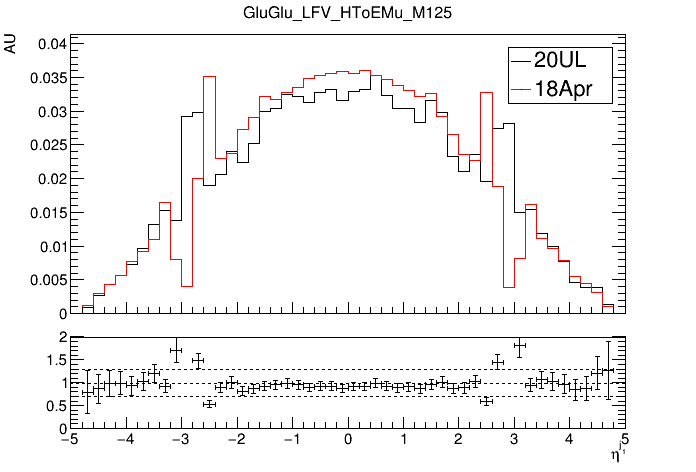

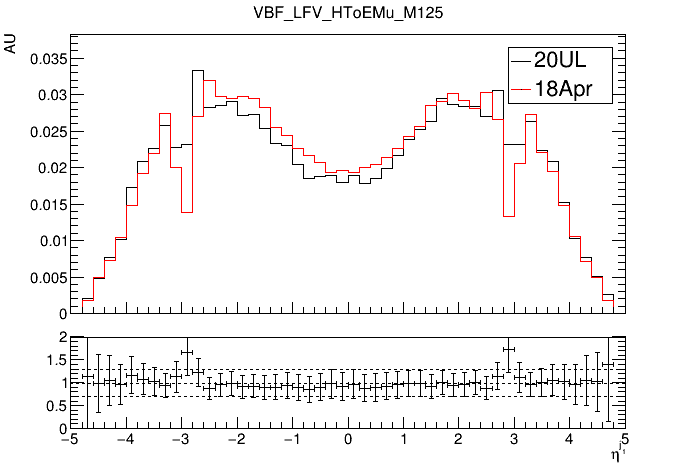

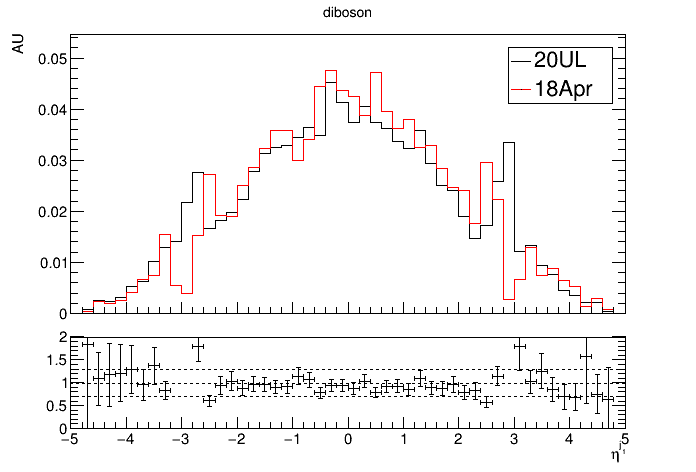

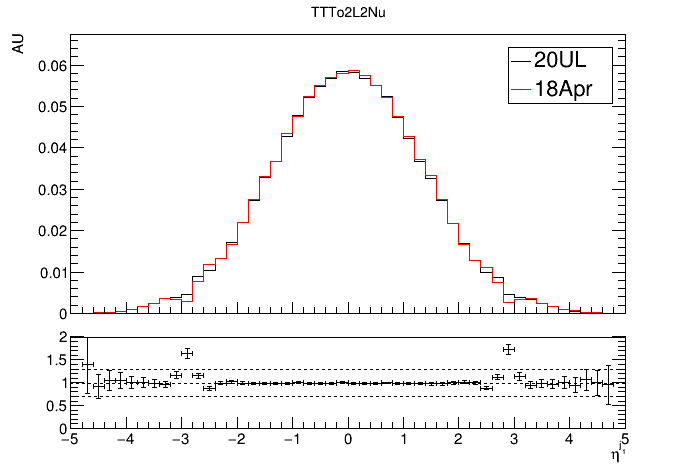

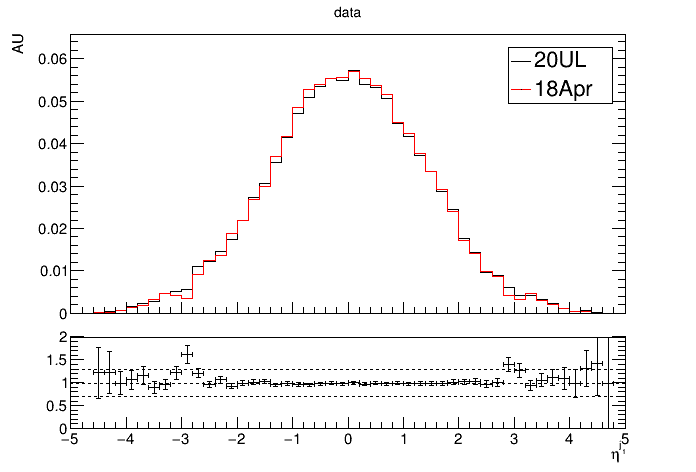

In [8]:
ULnames = ['GluGlu_LFV_HToEMu_M125', 'VBF_LFV_HToEMu_M125', 'diboson', 'TTTo2L2Nu', 'data']
fs_names = ["GluGlu_LFV_HToEMu_M125_13TeV_powheg_pythia8_v2-PU2017_12Apr2018_94X_mc2017_realistic_v14-v1",
            "VBF_LFV_HToEMu_M125_13TeV_powheg_pythia8_v2-PU2017_12Apr2018_94X_mc2017_realistic_v14-v1",
            "diboson",
            "TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8_v2-PU2017_12Apr2018_new_pmx_94X_mc2017_realistic_v14-v2",
            "data"]
fULs, fs = [], []
for ULname, fs_name in zip(ULnames, fs_names):
    fULs.append(r.TFile(f'/afs/hep.wisc.edu/user/kaho/NDHiggs/results/2017/makeHist/{ULname}.root'))
    fs.append(r.TFile(f'/afs/hep.wisc.edu/home/kaho/CMSSW_10_2_16_UL/src/UWHiggs2017/em/results/Data2017JEC/AnalyzeEMYield/noJnoB/{fs_name}.root'))

vars_ = ['j1Eta']#'emMass', 'ePt', 'mPt', 'eEta', 'mEta', 'j1Pt', 'j1Eta', 'j2Pt', 'j2Eta']
titles = ['#eta^{j_{1}}'] #'m_{e#mu} (GeV)', 'p_{T}^{e} (GeV)', 'p_{T}^{#mu} (GeV)', '#eta^{e}', '#eta^{#mu}', 'p_{T}^{j_{1}} (GeV)', '#eta^{j_{1}}', 'p_{T}^{j_{2}}(GeV)'
          #, '#eta^{j_{2}}']
c = []
legends = []
rps = []
for sample_name, f, fUL in zip(ULnames, fs, fULs):
    print(sample_name)
    for var_, title in zip(vars_, titles):
        c.append(r.TCanvas())
        c[-1].cd()
        h1 = fUL.Get(f'{var_}')
        h2 = f.Get(f'TightOS/{var_}')
        print(h1,h2)
        h1.Scale(1/h1.Integral())
        h2.Scale(1/h2.Integral())
        h1.SetMaximum((max(h1.GetMaximum(),h2.GetMaximum()))*1.15)

        if var_=='j1Pt': h1.GetXaxis().SetRangeUser(30, 300)
        if var_=='j2Pt': h1.GetXaxis().SetRangeUser(30, 160)
            
        h1.SetTitle(f'{sample_name};{title};AU')
        h1.SetLineColor(1)
        h2.SetLineColor(2)
        
        rps.append(r.TRatioPlot(h1, h2, "divsym"))
        rp = rps[-1]
        c[-1].SetTicks(0, 1)
        rp.SetH1DrawOpt('HIST')
        rp.SetH2DrawOpt('HIST')
        rp.Draw()
        rp.GetLowerRefGraph().SetMinimum(0)
        rp.GetLowerRefGraph().SetMaximum(2)
        rp.GetLowYaxis().SetRangeUser(0,10)
        rp.GetLowYaxis().SetNdivisions(505)
        legends.append(r.TLegend(0.73,0.78,0.88,0.9))
        legends[-1].AddEntry(h1, "20UL")
        legends[-1].AddEntry(h2, "18Apr")
        legends[-1].Draw('Same')
        c[-1].Update()
        c[-1].Draw()
    

GluGlu_LFV_HToEMu_M125
VBF_LFV_HToEMu_M125
diboson
TTTo2L2Nu
data


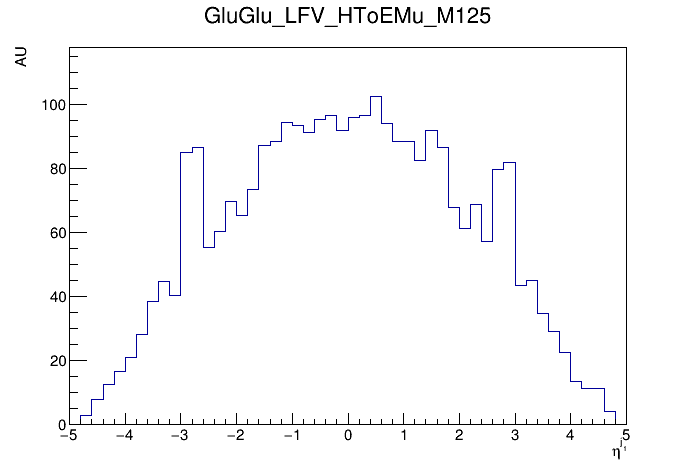

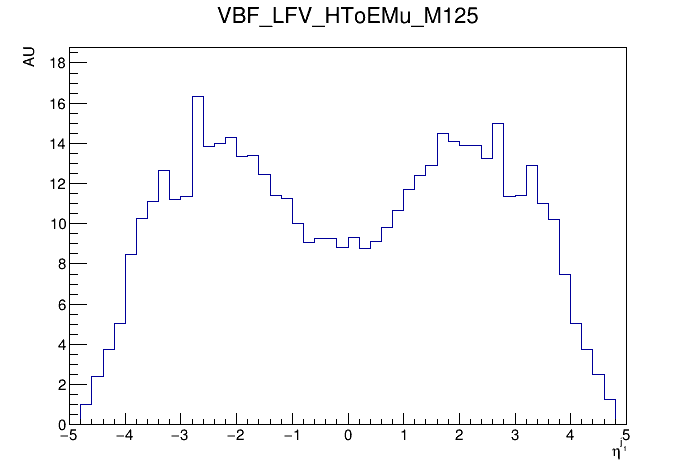

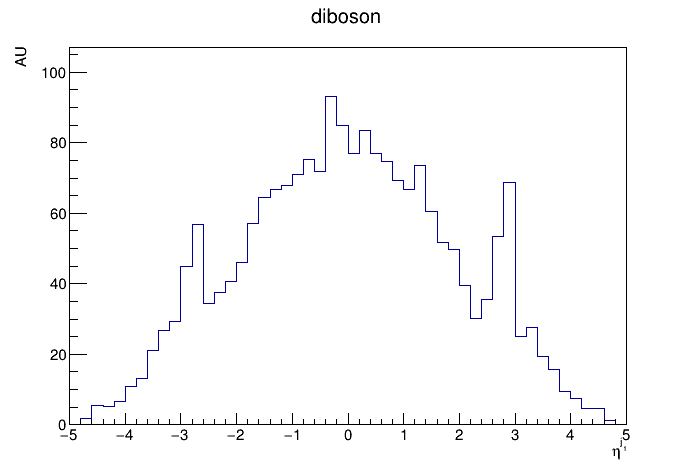

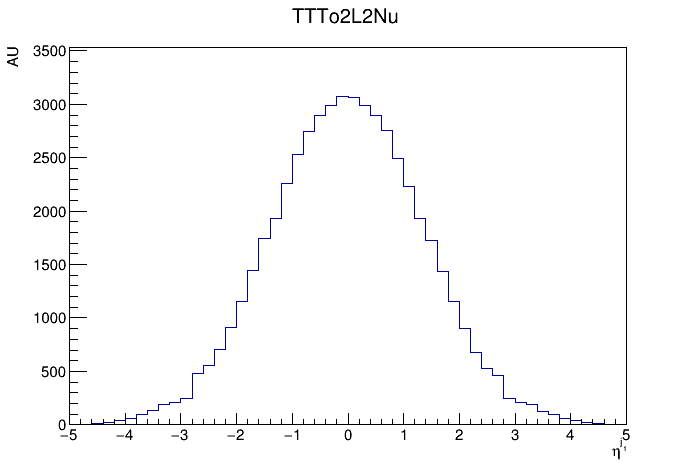

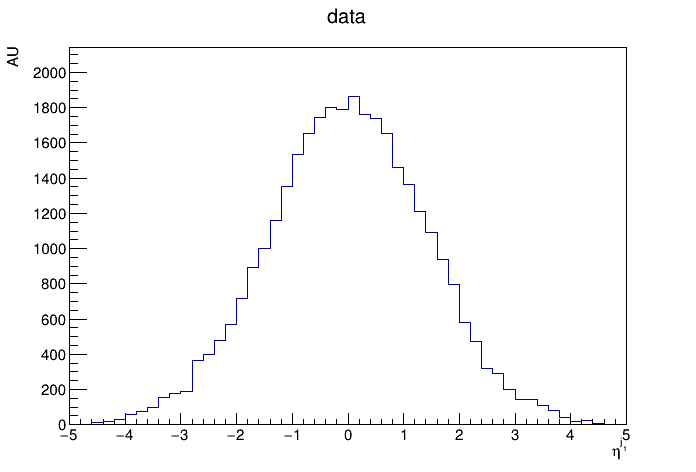

In [3]:
ULnames = ['GluGlu_LFV_HToEMu_M125', 'VBF_LFV_HToEMu_M125', 'diboson', 'TTTo2L2Nu', 'data']
fULs = []
for ULname in ULnames:
    fULs.append(r.TFile(f'/afs/hep.wisc.edu/user/kaho/NDHiggs/results/2017/makeHist/{ULname}.root'))

vars_ = ['j1Eta']#'emMass', 'ePt', 'mPt', 'eEta', 'mEta', 'j1Pt', 'j1Eta', 'j2Pt', 'j2Eta']
titles = ['#eta^{j_{1}}'] #'m_{e#mu} (GeV)', 'p_{T}^{e} (GeV)', 'p_{T}^{#mu} (GeV)', '#eta^{e}', '#eta^{#mu}', 'p_{T}^{j_{1}} (GeV)', '#eta^{j_{1}}', 'p_{T}^{j_{2}}(GeV)'
          #, '#eta^{j_{2}}']
c = []
legends = []
rps = []
for sample_name, fUL in zip(ULnames, fULs):
    print(sample_name)
    for var_, title in zip(vars_, titles):
        c.append(r.TCanvas())
        c[-1].cd()
        h1 = fUL.Get(f'{var_}')
        h1.Scale()
        h1.SetMaximum(h1.GetMaximum()*1.15)

        if var_=='j1Pt': h1.GetXaxis().SetRangeUser(30, 300)
        if var_=='j2Pt': h1.GetXaxis().SetRangeUser(30, 160)
            
        h1.SetTitle(f'{sample_name};{title};AU')
        h1.Draw('HIST')
        
        c[-1].Update()
        c[-1].Draw()
    

Name: run Title:  NbinsX: 11538 Name: run Title: run NbinsX: 11538


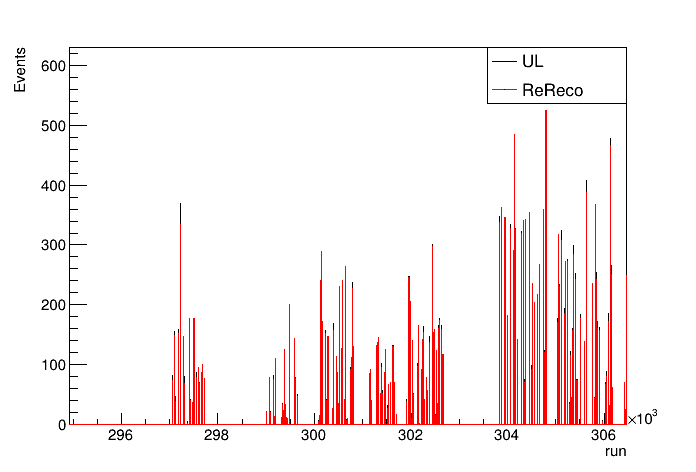

In [12]:
f_data = r.TFile('/afs/hep.wisc.edu/home/kaho/CMSSW_10_2_16_UL/src/UWHiggs2017/em/results/Data2017JEC/AnalyzeEMYield/noJnoB/data.root')
c = r.TCanvas()
h1 = fUL_data.Get('run')
h2 = f_data.Get('TightOS/run')
print(h1,h2)
h1.SetMaximum((max(h1.GetMaximum(),h2.GetMaximum()))*1.2)
h1.Draw('HIST')
h1.SetTitle(';run;Events')
h1.SetLineColor(1)
h2.Draw('HIST,Same')
h2.SetLineColor(2)
legend = r.TLegend(0.7,0.78,0.9,0.9)
legend.AddEntry(h1, "UL")
legend.AddEntry(h2, "ReReco")
legend.Draw('Same')
c.Draw()